In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load Dataset
df=pd.read_csv('diwali sales data.csv', encoding='unicode_escape')

In [3]:
#how many rows and columns in given dataset
df.shape

(11251, 15)

In [4]:
#to show first 5 records
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
#to drop unwanted column from given dataset permanently
df.drop('unnamed1',axis=1,inplace=True)

In [6]:
#to check all null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
dtype: int64

In [7]:
#to drop Status column from given dataset permanently
df.drop('Status',axis=1,inplace=True)

In [8]:
#to check datatypes of each columns
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
#to fill null values of Amount column with the mean of Amount column permanently
#first find the mean of Amount column
m=df['Amount'].mean()
df['Amount'].fillna(m,inplace=True)
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

F    7842
M    3409
Name: Gender, dtype: int64


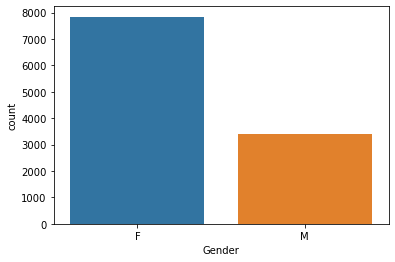

In [11]:
#Data Analysis
#Gender : F/M 
#Gender : is a categorical type data
#plotting a countplot or bargraph for gender

f=df['Gender'].value_counts()
print(f)
#plot
sb.countplot(data=df,x='Gender')
#plt.ytick(f)
plt.show()

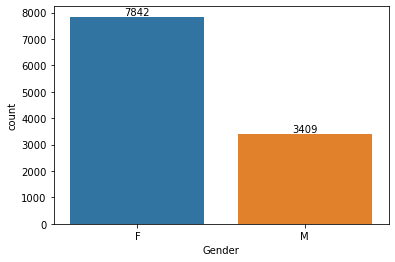

In [12]:
ax=sb.countplot(data=df,x='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [13]:
#plotting the count plot(bar graph) for Gender vs Total amount
df_gender =df.groupby('Gender',as_index=False)['Amount'].sum().round(2)
df_gender
                                                            

,Gender,Amount
0,F,74430392.54
1,M,31932183.22


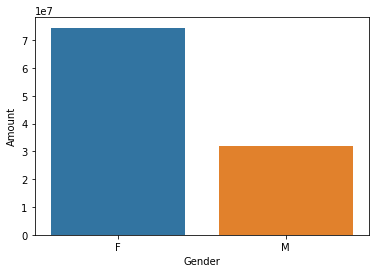

In [14]:
#plot

sb.barplot(data=df_gender,x='Gender',y='Amount')
plt.show()



In [15]:
#Conclusion : From above graphs we can see that most of the buyers are female and even th purchasing power of female are
#greater than men

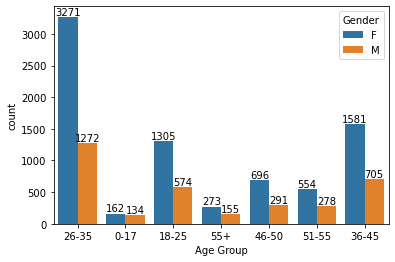

In [16]:
#Age Group wise Gender
ax=sb.countplot(data=df,x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

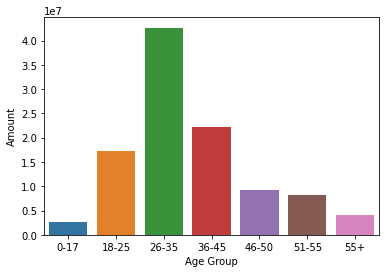

In [17]:
#Total Amount vs Age Group
sales_age=df.groupby('Age Group',as_index=False)['Amount'].sum()
sb.barplot(data=sales_age,x='Age Group', y='Amount')
plt.show()

In [18]:
#From above graphs we can see that most of the buyes are of age group between 26-35 yrs Female

In [19]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [20]:
#Sate wise No. of orders
#Total Number of orders from top 10 states

sales_state=df.groupby('State',as_index=False)['Orders'].sum()
#to arrange dataframe sales_state in descending order according to Orders
sales_state=sales_state.sort_values(by='Orders',ascending=False, ignore_index=True)

#Total Number of orders from top 10 states
sales_state.head(10)

,State,Orders
0,Uttar Pradesh,4813
1,Maharashtra,3811
2,Karnataka,3241
3,Delhi,2744
4,Madhya Pradesh,2259
5,Andhra Pradesh,2054
6,Himachal Pradesh,1568
7,Kerala,1137
8,Haryana,1109
9,Gujarat,1070


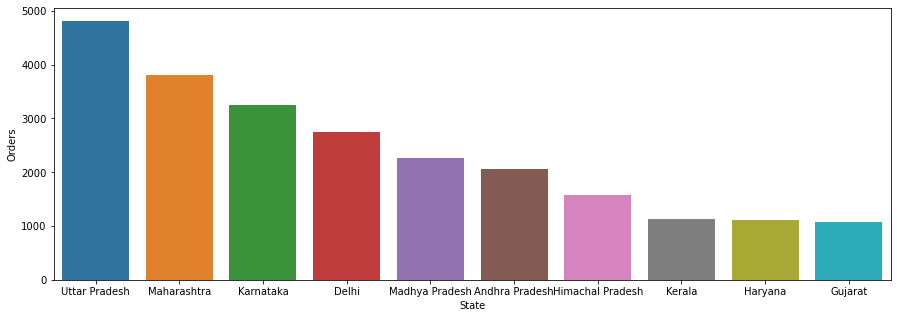

In [21]:
#Visualisation barplot
sales_state=sales_state.head(10)  #top 10
plt.figure(figsize=(15,5))
sb.barplot(data=sales_state, x='State',y='Orders')

plt.show()

In [22]:
#Total sales Amount from top 10 States means show amount wise highest sales by States

sales_state_amt=df.groupby('State',as_index=False)['Amount'].sum().round(2)
#to arrange records in descending orders according to Amount
sales_state_amt=sales_state_amt.sort_values('Amount',ascending=False,ignore_index=True)

sales_state_amt

,State,Amount
0,Uttar Pradesh,19393875.22
1,Maharashtra,14436996.61
2,Karnataka,13532993.61
3,Delhi,11632180.28
4,Madhya Pradesh,8120049.22
5,Andhra Pradesh,8046600.60
6,Himachal Pradesh,4963368.00
7,Haryana,4220175.00
8,Bihar,4022757.00
9,Gujarat,3964989.22


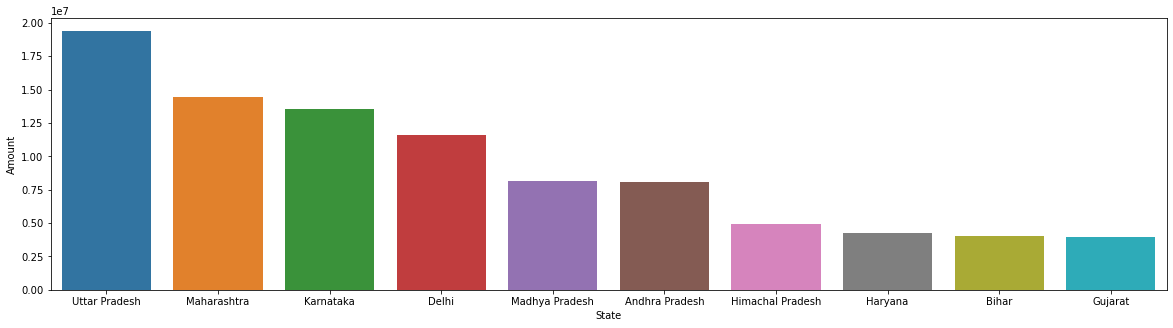

In [24]:
#Total sales Amount from top 10 States
sales_state_amt=sales_state_amt.head(10)

#Visualisation barplot
plt.figure(figsize=(20,5))
sb.barplot(data=sales_state_amt, x='State',y='Amount')
plt.show()

In [ ]:
#from above graphs we can see that most of the orders and total sales'Amount wise are from Uttar-Pradesh,
#Maharashtra and Karnataka respectively.

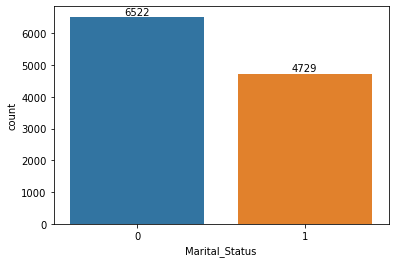

In [25]:
#Marital Status
#How many people are Married and Unmarried whose diwali's shopping
ax=sb.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

#0 : Married  and 1: Unmarried

In [33]:
sales_status_gender=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().round(2)
#arranged dataframe in descending order amount wise
sales_status_gender=sales_status_gender.sort_values('Amount',ascending=False, ignore_index=True)
sales_status_gender

,Marital_Status,Gender,Amount
0,0,F,43815009.27
1,1,F,30615383.27
2,0,M,18348191.61
3,1,M,13583991.61


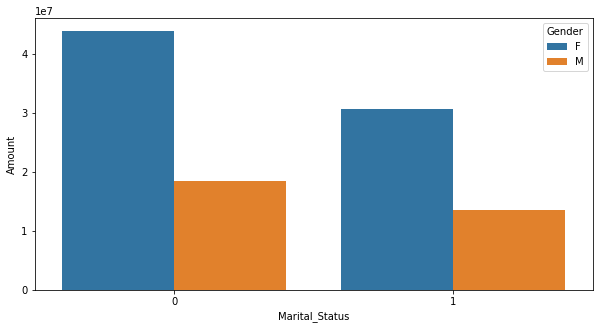

In [34]:
#Visualise bar plot
plt.figure(figsize=(10,5))
sb.barplot(data=sales_status_gender, x='Marital_Status',y='Amount',hue='Gender')
plt.show()

In [ ]:
#from Above graphs we can see that most of the buyers are Married(Women) and they have high purchasing power

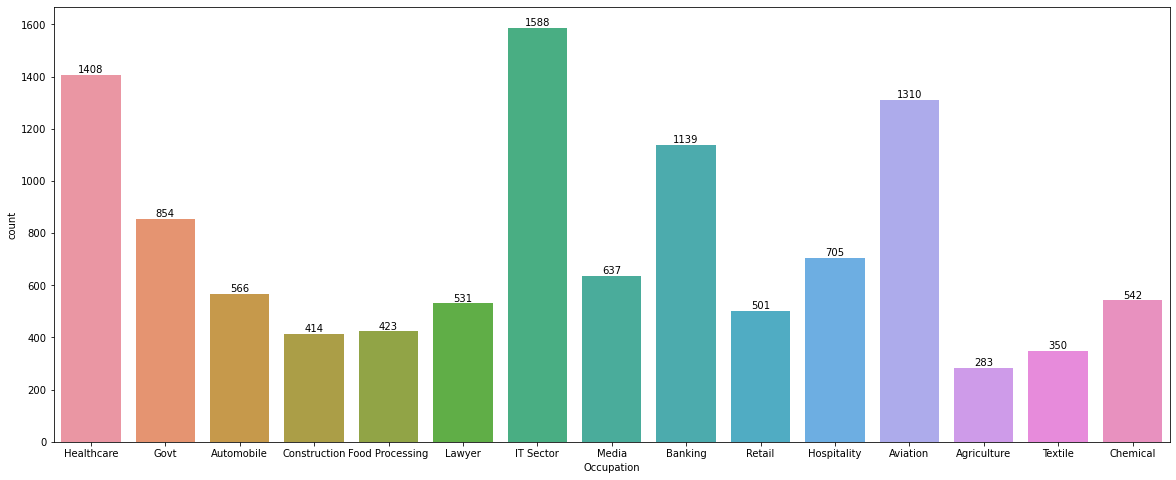

In [35]:
#Occupation :
plt.figure(figsize=(20,8))
ax=sb.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

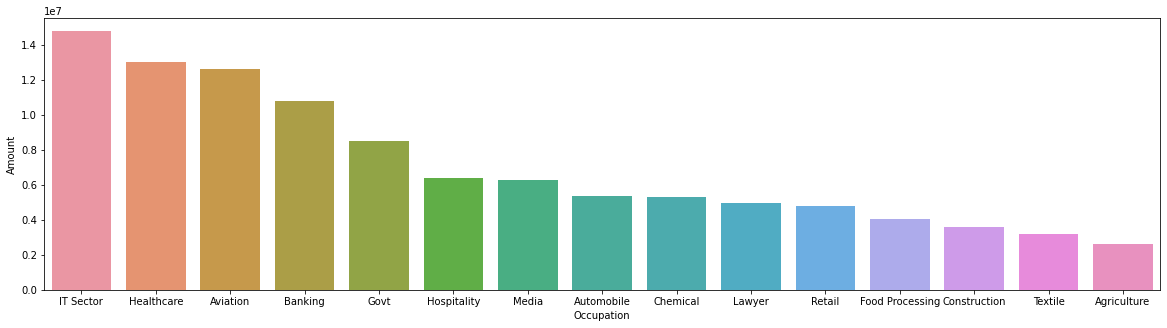

In [39]:
#Amount wise sales with Occupation
sales_occup_amt=df.groupby('Occupation', as_index=False)['Amount'].sum().round(2)
#To arrange dataframe descending order by Amount
sales_occup_amt=sales_occup_amt.sort_values('Amount',ascending=False, ignore_index=True)
plt.figure(figsize=(20,5))
sb.barplot(data=sales_occup_amt,x='Occupation',y='Amount')
plt.show()


In [ ]:
#From Above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector


In [40]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

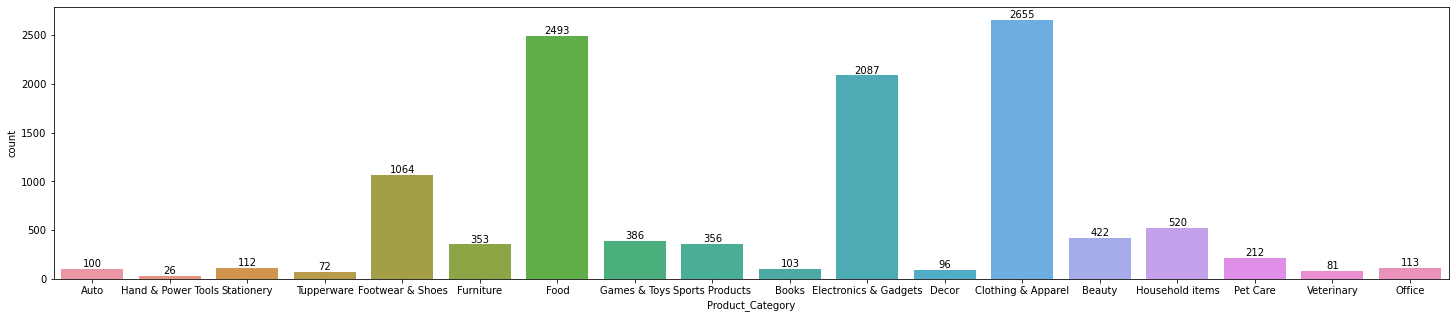

In [44]:
#Product Category

plt.figure(figsize=(25,5))
ax=sb.countplot(data=df, x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

<AxesSubplot:>

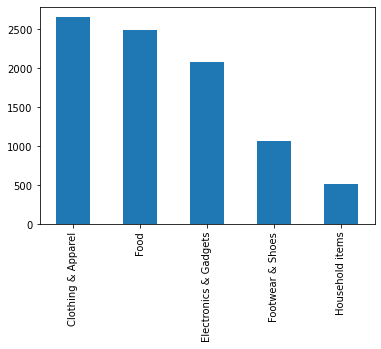

In [46]:
df1=df['Product_Category'].value_counts()
df1=df1.head()
df1.plot(kind='bar')

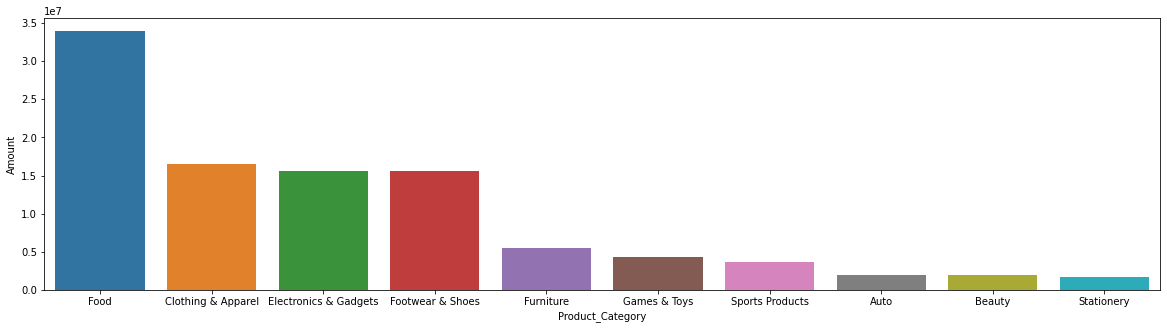

In [47]:
#Amount wise sales with Product_Category
sales_product_amt=df.groupby('Product_Category', as_index=False)['Amount'].sum().round(2)
#To arrange dataframe descending order by Amount
sales_product_amt=sales_product_amt.sort_values('Amount',ascending=False, ignore_index=True)
sales_product_amt=sales_product_amt.head(10)
plt.figure(figsize=(20,5))
sb.barplot(data=sales_product_amt,x='Product_Category',y='Amount')
plt.show()


In [ ]:
#From above graph we can see that most of the sold product are from food, clothing ans electronic category

In [ ]:
#Conclusion:
'''
Married  Women age group 26-35 yrs from UP, Maharashtra and Karnataka
Working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category
'''